In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
sns.set_theme(style="whitegrid")

## Movies Metadata

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| wikipedia_movie_id | ID of the movie from wikipedia                                                                                                                                                 |   |   |   |
| freebase_movie_id| ID of the movie from freebas                                                                                                                                            |   |   |   |
| movie_name | Name of the movie                                                                                                                                                |   |   |   |
| movie_release_date  | Date the movie was released                                                                                                                                      |   |   |   |
| movie_box_office_revenue  | Revenue of the movie box office                                                                                                                           
| movie_runtime  | Run time of the movie                                                                                                                                                 |   |   |   |
| movie_languages | Languages of the movie                                                                                                                                                  |   |   |   |
| movie_countries | Countries where the movie were created                                                                                                                                  |   |   |   |
| movie_genres   | Genre of the movie                                                                                                                                              |   |   |   |

The movie data set contains 81741 rows.



In [2]:
data_folder = './data/'

names = ['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 
        'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']

movies_data = pd.read_csv(data_folder + 'movie.metadata.tsv', names = names, sep = '\t', )

movies_data[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']]= movies_data[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']].applymap(lambda x: str.lower(x))

movies_data.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,ghosts of mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""english language""}","{""/m/09c7w0"": ""united states of america""}","{""/m/01jfsb"": ""thriller"", ""/m/06n90"": ""science..."
1,3196793,/m/08yl5d,getting away with murder: the jonbenét ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""english language""}","{""/m/09c7w0"": ""united states of america""}","{""/m/02n4kr"": ""mystery"", ""/m/03bxz7"": ""biograp..."
2,28463795,/m/0crgdbh,brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""norwegian language""}","{""/m/05b4w"": ""norway""}","{""/m/0lsxr"": ""crime fiction"", ""/m/07s9rl0"": ""d..."
3,9363483,/m/0285_cd,white of the eye,1987,NaN,110.0,"{""/m/02h40lc"": ""english language""}","{""/m/07ssc"": ""united kingdom""}","{""/m/01jfsb"": ""thriller"", ""/m/0glj9q"": ""erotic..."
4,261236,/m/01mrr1,a woman in flames,1983,NaN,106.0,"{""/m/04306rv"": ""german language""}","{""/m/0345h"": ""germany""}","{""/m/07s9rl0"": ""drama""}"


In [3]:
#rating files loading
ratings = pd.read_csv(data_folder + 'title.ratings.tsv.gz', sep='\t', compression='gzip')
titles = pd.read_csv(data_folder + 'title.basics.tsv.gz', sep='\t', compression='gzip')

rates = ratings.merge(titles, how='left', on='tconst')[['averageRating', 'numVotes', 'originalTitle']]
rates['movie_name'] = [ele.lower() for ele in rates['originalTitle'].astype(str)]
rates=rates.drop(columns='originalTitle')

C:\Users\hugom\AppData\Local\Temp\ipykernel_2340\3684157716.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles = pd.read_csv(data_folder + 'title.basics.tsv.gz', sep='\t', compression='gzip')


In [4]:
indian_movies = movies_data[movies_data['movie_countries'] == '{"/m/03rk0": "india"}']
american_movies = movies_data[movies_data['movie_countries'] == '{"/m/09c7w0": "united states of america"}']

indian_movies = indian_movies.merge(rates, how='left', on='movie_name')
american_movies = american_movies.merge(rates, how='left', on='movie_name')

print(len(indian_movies), len(american_movies))

16874 112713


In [5]:
print('%.3f percent of indian movies have a rating and %.3f percent of american movies have a rating' %
(100-np.sum(indian_movies['averageRating'].isna())/indian_movies.shape[0]*100, 100-np.sum(american_movies['averageRating'].isna())/american_movies.shape[0]*100))

print('Average rating of indian movies : %.3f \tAverage rating of american movies : %.3f' %
(np.mean(indian_movies['averageRating']), np.mean(american_movies['averageRating'])))

86.636 percent of indian movies have a rating and 96.779 percent of american movies have a rating
Average rating of indian movies : 6.651 	Average rating of american movies : 6.854


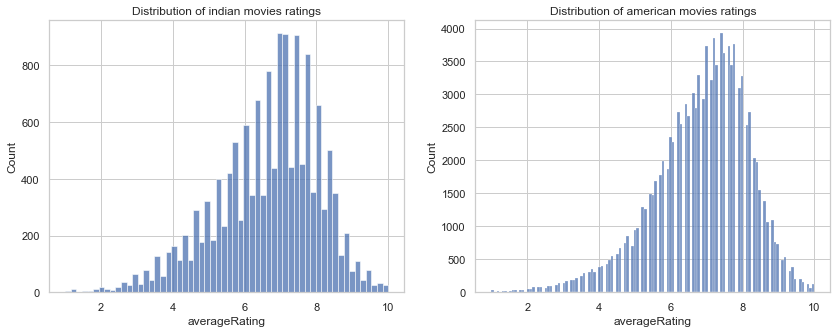

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(x='averageRating', data=indian_movies)
plt.title('Distribution of indian movies ratings')
plt.subplot(1,2,2)
sns.histplot(x='averageRating', data=american_movies)
plt.title('Distribution of american movies ratings')
plt.show()

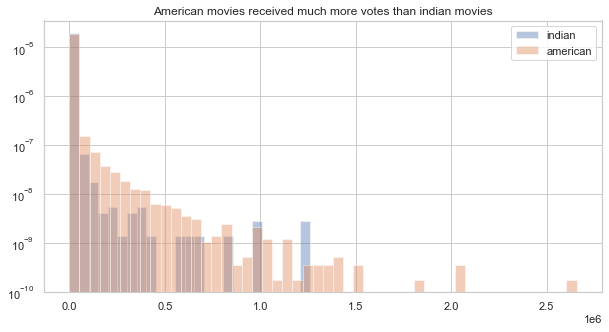

In [35]:
plt.figure(figsize=(10,5))
plt.hist(indian_movies['numVotes'], density=True, bins = 25, alpha=.4, label='indian')
plt.hist(american_movies['numVotes'], density=True, bins = 50, alpha = 0.4, label='american')
plt.yscale('log')
plt.title('American movies received much more votes than indian movies')
plt.legend()
plt.show()

In [7]:
print('P-value for normality test of american movies : %.3f \tP-value for normality test of indian movies : %.3f ' 
      % (st.normaltest(american_movies['averageRating'], nan_policy='omit').pvalue, st.normaltest(indian_movies['averageRating'], nan_policy='omit').pvalue))

P-value for normality test of american movies : 0.000 	P-value for normality test of indian movies : 0.000 


In [8]:
#center data on mean
indian_movies['centeredRating']=indian_movies['averageRating']-np.mean(indian_movies['averageRating'])
american_movies['centeredRating']=american_movies['averageRating']-np.mean(american_movies['averageRating'])
print('Centered average rating of indian movies : %.3f \tCentered average rating of american movies : %.3f' %
(np.mean(indian_movies['centeredRating']), np.mean(american_movies['centeredRating'])))

Centered average rating of indian movies : 0.000 	Centered average rating of american movies : -0.000


In [9]:
indian_movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,averageRating,numVotes,centeredRating
0,20604092,/m/0523t_1,anbu thozhi,2007-08-17,NaN,NaN,"{""/m/07c9s"": ""tamil language""}","{""/m/03rk0"": ""india""}","{""/m/02l7c8"": ""romance film""}",NaN,NaN,NaN
1,11448183,/m/02rc_h4,bindiya chamkegi,1984-01-20,NaN,NaN,"{""/m/03k50"": ""hindi language""}","{""/m/03rk0"": ""india""}","{""/m/0hqxf"": ""family film"", ""/m/01z4y"": ""comedy""}",5.1,22.0,-1.551344
2,9633533,/m/02pml15,vandanam,1989,NaN,168.0,"{""/m/0999q"": ""malayalam language""}","{""/m/03rk0"": ""india""}","{""/m/02kdv5l"": ""action""}",7.9,1197.0,1.248656
3,29528534,/m/04j0lfk,anokha rishta,1986,NaN,180.0,"{""/m/03k50"": ""hindi language""}","{""/m/03rk0"": ""india""}","{""/m/03q4nz"": ""world cinema"", ""/m/04t36"": ""mus...",7.3,57.0,0.648656
4,29772142,/m/0fq260_,karayilekku oru kadal dooram,2010-12-31,NaN,110.0,"{""/m/0999q"": ""malayalam language""}","{""/m/03rk0"": ""india""}","{""/m/07s9rl0"": ""drama""}",6.6,15.0,-0.051344


## Movie Genre


In [ ]:
test_indian = indian_movies.copy()
#remove {}
test_indian['cleared_movie_genres'] = test_indian['movie_genres'].str[1:-1]
#remove films without genre
test_indian = test_indian.query("cleared_movie_genres != ''")

test_indian.head()

In [ ]:
#create list with all genres
all_genres_listed_indian = test_indian['cleared_movie_genres'].str.split(pat=",")

ls = []
for i in all_genres_listed_indian:
    ls.extend(i)
 
all_genres_indian = pd.Series(ls)
all_genres_indian = all_genres_indian.str.strip().value_counts()

In [ ]:
#ploting taking the first 50 genres
first_genres_indian = all_genres_indian[:50]
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(y = first_genres_indian.index, x = first_genres_indian).set_title('Movie genres apparition in indian movies')
sns.despine(left=True, bottom=True)

In [ ]:
test_american = american_movies.copy()
#remove {}
test_american['cleared_movie_genres'] = test_american['movie_genres'].str[1:-1]
#remove films without genre
test_american = test_american.query("cleared_movie_genres != ''")
test_american.head()

In [ ]:
#create list with all genres
all_genres_listed_american = test_american['cleared_movie_genres'].str.split(pat=",")

ls = []
for i in all_genres_listed_american:
    ls.extend(i)
 
all_genres_american = pd.Series(ls)
all_genres_american = all_genres_american.str.strip().value_counts()

In [ ]:
#ploting taking the first 50 genres
first_genres_american = all_genres_american[:50]
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(y = first_genres_american.index, x = first_genres_american).set_title('Movie genres apparition in American movies')
sns.despine(left=True, bottom=True)

In [ ]:
all_genres_american_frequency = all_genres_american/all_genres_american.sum()
first_genres_american_frequency = all_genres_american_frequency[:50]
all_genres_indian_frequency = all_genres_indian/all_genres_indian.sum()
first_genres_indian_frequency = all_genres_indian_frequency[:50]

In [ ]:
#ploting taking the first 50 genres
fig, ax = plt.subplots(1,2,figsize=(10, 16),sharex = True, constrained_layout=True)
fig.suptitle('Movie genres frequency in american and indian films')
ax[0].set_title('America')
ax[1].set_title('India')
sns.barplot(ax = ax[0],y = first_genres_american_frequency.index, x = first_genres_american_frequency, label="American", color="b")

sns.barplot(ax = ax[1], y = first_genres_indian_frequency.index, x = first_genres_indian_frequency, label="Indian", color="r")


### Missing values

We can already see that movie_box_office_revenue column contain loads of missing data in both indian and american movies, followed by movie runtime.

In [ ]:
indian_movies.info()

### Cleaning data 

Our indian and american movies data base both do not contain any duplicates on either wikipedia movie ID nor freebase ID.

In [ ]:
print('wiki ID, indian: ', len(indian_movies.drop_duplicates('wikipedia_movie_id')), '\nfreebase ID, indian: ', len(indian_movies.drop_duplicates('freebase_movie_id')))
print('wiki ID, american: ', len(american_movies.drop_duplicates('wikipedia_movie_id')), '\nfreebase ID, american: ', len(american_movies.drop_duplicates('freebase_movie_id')))

## Characters data

450'668 characters in raw data

134079 differents actor 

5794 differents actor in indian movies

59398 differents actors in american movies


In [ ]:
names = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age_at_movie_release', 'char_act_id', 'freebase_character_id', 'freebase_actor_id']
characters_data = pd.read_csv(data_folder + 'character.metadata.tsv', names = names, sep = '\t')

characters_data.head(10)

In [ ]:
characters_data[['character_name', 'actor_name']] = characters_data[['character_name', 'actor_name']].applymap(lambda x: x if type(x)!=str else x.lower())

In [ ]:
characters_data.head()

In [ ]:
unique_american_actor = characters_data[characters_data['wikipedia_movie_id'].isin(american_movies['wikipedia_movie_id'])].drop_duplicates('actor_name')
unique_indian_actor = characters_data[characters_data['wikipedia_movie_id'].isin(indian_movies['wikipedia_movie_id'])].drop_duplicates('actor_name')

In [ ]:
unique_american_actor.head()

In [ ]:
american_character =characters_data[characters_data['wikipedia_movie_id'].isin(american_movies['wikipedia_movie_id'])]
american_character =characters_data[characters_data['wikipedia_movie_id'].isin(american_movies['wikipedia_movie_id'])]

## Name clusters data

In [ ]:
names = ['character_name', 'actor_reference']
name_clusters_data = pd.read_csv(data_folder + 'name.clusters.txt', names = names, sep = '\t', )

name_clusters_data.head(10)

## **Tvtropes clusters data**

In [ ]:
tvt_rope = pd.read_csv(data_folder + 'tvtropes.clusters.txt', sep='\t', names= ['character_type', 'instances'])

print(len(tvt_rope))
tvt_rope

### Formatting data

In [ ]:
tvt_rope['instances'] = tvt_rope['instances'].str.replace('{','').str.replace('}', '').str.replace('"', '')

split_tvt = tvt_rope.copy()

split_tvt = tvt_rope['instances'].str.split('[,:]', expand=True)

cleaned_tvt = split_tvt.rename(columns={split_tvt.columns[1]: 'character_name', split_tvt.columns[3]: 'movie_name', split_tvt.columns[5]: 'char_act_id',split_tvt.columns[7]: 'actor_name'})

cleaned_tvt = cleaned_tvt.drop(columns=[0,2,4,6,8,9,10])

characters = tvt_rope.character_type

final_tvt = cleaned_tvt.join(characters, how= 'left')

final_tvt[['character_name', 'movie_name', 'actor_name', 'character_type']] = final_tvt[['character_name', 'movie_name', 'actor_name', 'character_type']].applymap(lambda x: str.casefold(x))

final_tvt.head()

In [ ]:
american_actors = unique_american_actor.copy()
american_actors['actor_name'] = unique_american_actor['actor_name'].astype('str')

american_actors = american_actors['actor_name']

final_tvt.actor_name = final_tvt.actor_name.dropna()

american_tvt = final_tvt.merge(american_actors, on = 'actor_name')

american_tvt

In [ ]:
american_tvt2 = final_tvt[final_tvt['actor_name'].isin(unique_american_actor['actor_name'])]

american_tvt2

In [ ]:
american_tvt2 = final_tvt[final_tvt['movie_name'].isin(american_movies['movie_name'])]

american_tvt2

## Summaries data

In [ ]:
summaries = pd.read_csv(data_folder + 'plot_summaries.txt', sep = '\r', names = ['summaries'])
summaries = summaries['summaries'].str.split("\t", expand = True)
summaries = summaries.rename(columns= {0:'wikipedia_movie_id',1: 'summaries'})
summaries['summaries'] = summaries['summaries'].str.lower()
summaries['wikipedia_movie_id'] = summaries['wikipedia_movie_id'].astype(int)
summaries.head(10)

In [ ]:
indian_summaries = summaries[summaries['wikipedia_movie_id'].isin(indian_movies['wikipedia_movie_id'])]
indian_summaries

In [ ]:
american_summaries = summaries[summaries['wikipedia_movie_id'].isin(american_movies['wikipedia_movie_id'])]
american_summaries

In [ ]:
indian_separated_words = indian_summaries['summaries'].str.split()

ls = []
 
for i in indian_separated_words:
    ls.extend(i)

indian_separated_words = pd.Series(ls)
indian_separated_words = indian_separated_words[indian_separated_words.str.len() > 4]
indian_separated_words = indian_separated_words.value_counts()

In [ ]:
indian_separated_words = indian_separated_words[:100]
f, ax = plt.subplots(figsize=(6, 20))
sns.barplot(y = indian_separated_words.index, x = indian_separated_words)

In [ ]:
american_separated_words = american_summaries['summaries'].str.split()

ls = []
 
for i in american_separated_words:
    ls.extend(i)

    
american_separated_words = pd.Series(ls)
american_separated_words = american_separated_words[american_separated_words.str.len() > 4]
american_separated_words = american_separated_words.value_counts()

In [ ]:
american_separated_words = american_separated_words[:100]
f, ax = plt.subplots(figsize=(6, 20))
sns.barplot(y = american_separated_words.index, x = american_separated_words)